In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
df.corr(method="pearson")

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


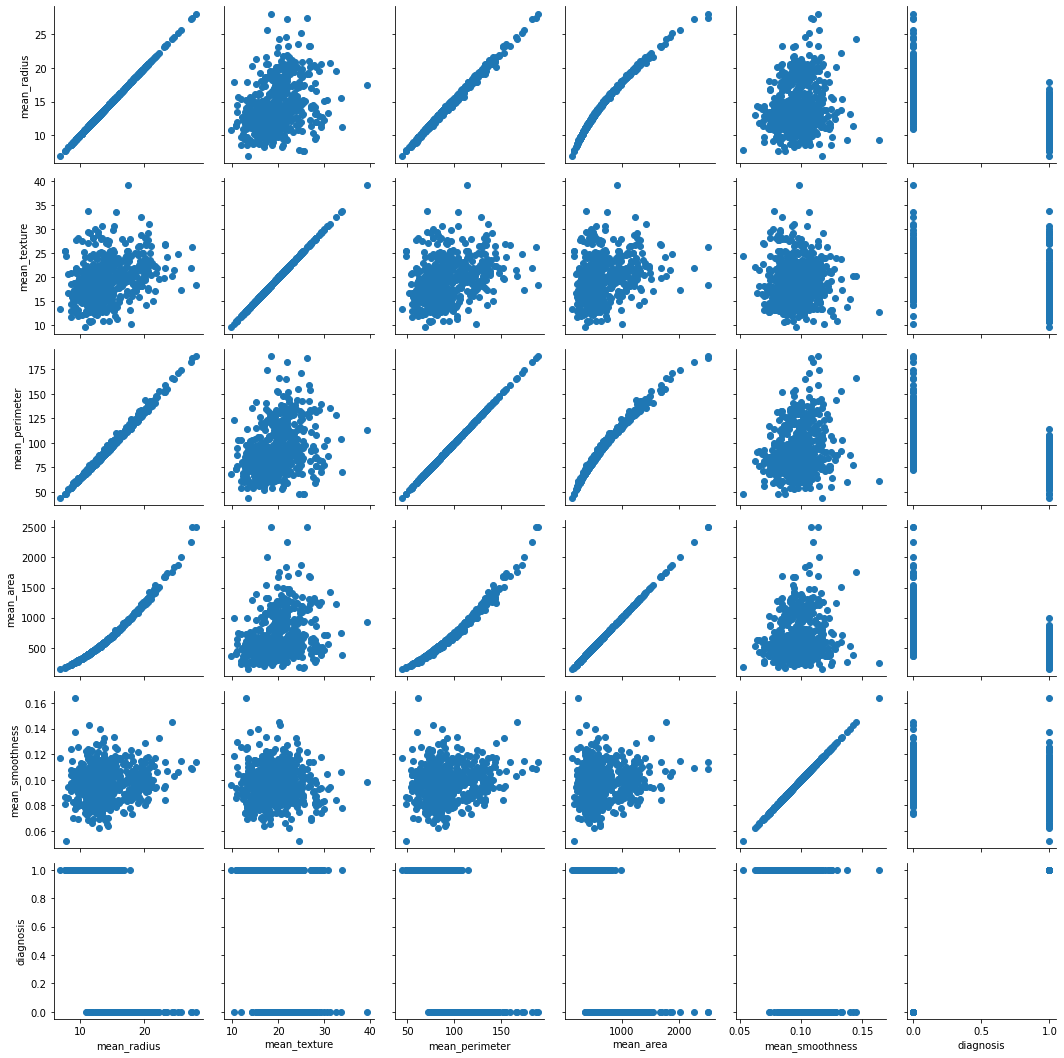

In [8]:
x=sns.PairGrid(data=df)
x.map(plt.scatter)

In [9]:
df.groupby("diagnosis").mean()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898
1,12.146524,17.914762,78.075406,462.790196,0.092478


In [10]:
df.groupby("diagnosis").count()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,212,212,212,212,212
1,357,357,357,357,357


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [12]:
from sklearn.preprocessing import StandardScaler
for i in df.drop(columns=["diagnosis"]).columns:
    print(i)
    df[i+"_stand"]=StandardScaler().fit_transform(df[[i]])

mean_radius
mean_texture
mean_perimeter
mean_area
mean_smoothness


In [13]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,mean_radius_stand,mean_texture_stand,mean_perimeter_stand,mean_area_stand,mean_smoothness_stand
0,17.99,10.38,122.80,1001.0,0.11840,0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,20.57,17.77,132.90,1326.0,0.08474,0,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,19.69,21.25,130.00,1203.0,0.10960,0,1.579888,0.456187,1.566503,1.558884,0.942210
3,11.42,20.38,77.58,386.1,0.14250,0,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,20.29,14.34,135.10,1297.0,0.10030,0,1.750297,-1.151816,1.776573,1.826229,0.280372
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0,2.110995,0.721473,2.060786,2.343856,1.041842
565,20.13,28.25,131.20,1261.0,0.09780,0,1.704854,2.085134,1.615931,1.723842,0.102458
566,16.60,28.08,108.30,858.1,0.08455,0,0.702284,2.045574,0.672676,0.577953,-0.840484
567,20.60,29.33,140.10,1265.0,0.11780,0,1.838341,2.336457,1.982524,1.735218,1.525767


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness"]), df["diagnosis"], test_size=0.33, random_state=42)

In [15]:
X_train


,mean_radius_stand,mean_texture_stand,mean_perimeter_stand,mean_area_stand,mean_smoothness_stand
172,0.378508,-1.721948,0.433773,0.233247,2.087974
407,-0.362769,0.484112,-0.384677,-0.399281,-1.483819
56,1.443561,-0.167467,1.381147,1.413834,0.636199
497,-0.470694,-0.460677,-0.474471,-0.497118,-0.503871
301,-0.473535,0.139706,-0.475295,-0.522146,-0.843330
...,...,...,...,...,...
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015


In [16]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 0.1, 0.01]}
svc = SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)

In [17]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 0.1, 0.01], 'kernel': ('linear', 'rbf')})

In [18]:
clf.score(X_test, y_test)

0.9521276595744681

In [19]:
mean_squared_error(y_test, clf.predict(X_test))

0.047872340425531915

In [20]:
bins = { "mean_texture": 3, "mean_perimeter": 2, "mean_smoothness": 2}
for j in bins.keys():
    df[j+"_bin"] = pd.cut(df[j], bins[j], labels=False)

In [21]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis', 'mean_radius_stand',
       'mean_texture_stand', 'mean_perimeter_stand', 'mean_area_stand',
       'mean_smoothness_stand', 'mean_texture_bin', 'mean_perimeter_bin',
       'mean_smoothness_bin'],
      dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["diagnosis", "mean_radius", "mean_texture", "mean_area", "mean_smoothness", "mean_area_stand", "mean_radius_stand", "mean_perimeter"]), df["diagnosis"], test_size=0.35, random_state=42)

In [23]:
X_test

,mean_texture_stand,mean_perimeter_stand,mean_smoothness_stand,mean_texture_bin,mean_perimeter_bin,mean_smoothness_bin
204,-0.160486,-0.448110,0.234114,0,0,0
70,0.470149,1.302886,-0.446227,1,1,0
131,0.044296,0.400820,0.913744,0,0,1
431,-0.374576,-0.432457,0.643316,0,0,0
540,-1.128546,-0.713374,0.247636,0,0,0
...,...,...,...,...,...,...
277,0.160649,1.191672,-0.507430,1,1,0
49,0.700529,-0.208383,-0.629123,1,0,0
234,-0.786467,-1.308161,-0.834079,0,0,0
25,-0.672441,0.989840,1.582699,0,0,1


In [24]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 0.1, 0.01, 0.001, 0.0001]}
svc = SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)

In [25]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')})

In [26]:
clf.score(X_test, y_test)

0.97

In [27]:
mean_squared_error(y_test, clf.predict(X_test))

0.03

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.98      0.98      0.98       129

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [30]:
params = {'C':[0.1, 1, 10, 0.001], 'solver':['liblinear', 'lbfgs', 'sag']}
lr = LogisticRegression(max_iter=3000)
cf = GridSearchCV(lr, params, cv=5)

In [31]:
cf.fit(X_train, y_train)
print(cf.best_params_)
print(cf.score(X_test, y_test))

{'C': 1, 'solver': 'liblinear'}
0.96


In [32]:
mean_squared_error(y_test, clf.predict(X_test))

0.03

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
params = {'n_neighbors':[2, 3], 'weights':['uniform', 'distance']}
knn = KNeighborsClassifier()
cf = GridSearchCV(knn, params, cv=5)

In [35]:
cf.fit(X_train, y_train)
print(cf.best_params_)
print(cf.score(X_test, y_test))

{'n_neighbors': 3, 'weights': 'uniform'}
0.91


In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1, max_iter=10000)
p = {'alpha':[0.01, 0.1, 1, 10], 'solver':['adam'],
                                                   'activation':['relu', 'tanh']}
clf = GridSearchCV(mlp, p, cv=5)

In [40]:
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(alpha=1, max_iter=10000),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.01, 0.1, 1, 10], 'solver': ['adam']})

In [39]:
clf.score(X_test, y_test)

0.96

In [41]:
import pickle as pkl

In [ ]:
linear_model = LinearRegression()
logistic_model.fit(X_train, y_train)

filename = 'linear_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) 